In [1]:
import pandas as pd
import numpy as np

In [2]:
hr_df=pd.read_csv('.../hr/HR_comma_sep.csv')

In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

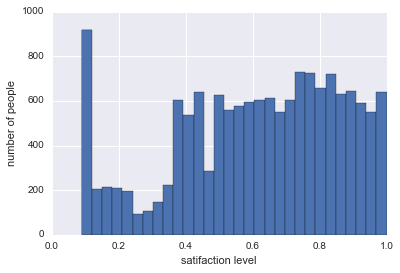

In [5]:
#1st, the basic visualizations

plt.hist(hr_df['satisfaction_level'],bins=30)
plt.xlabel('satifaction level')
plt.ylabel('number of people')

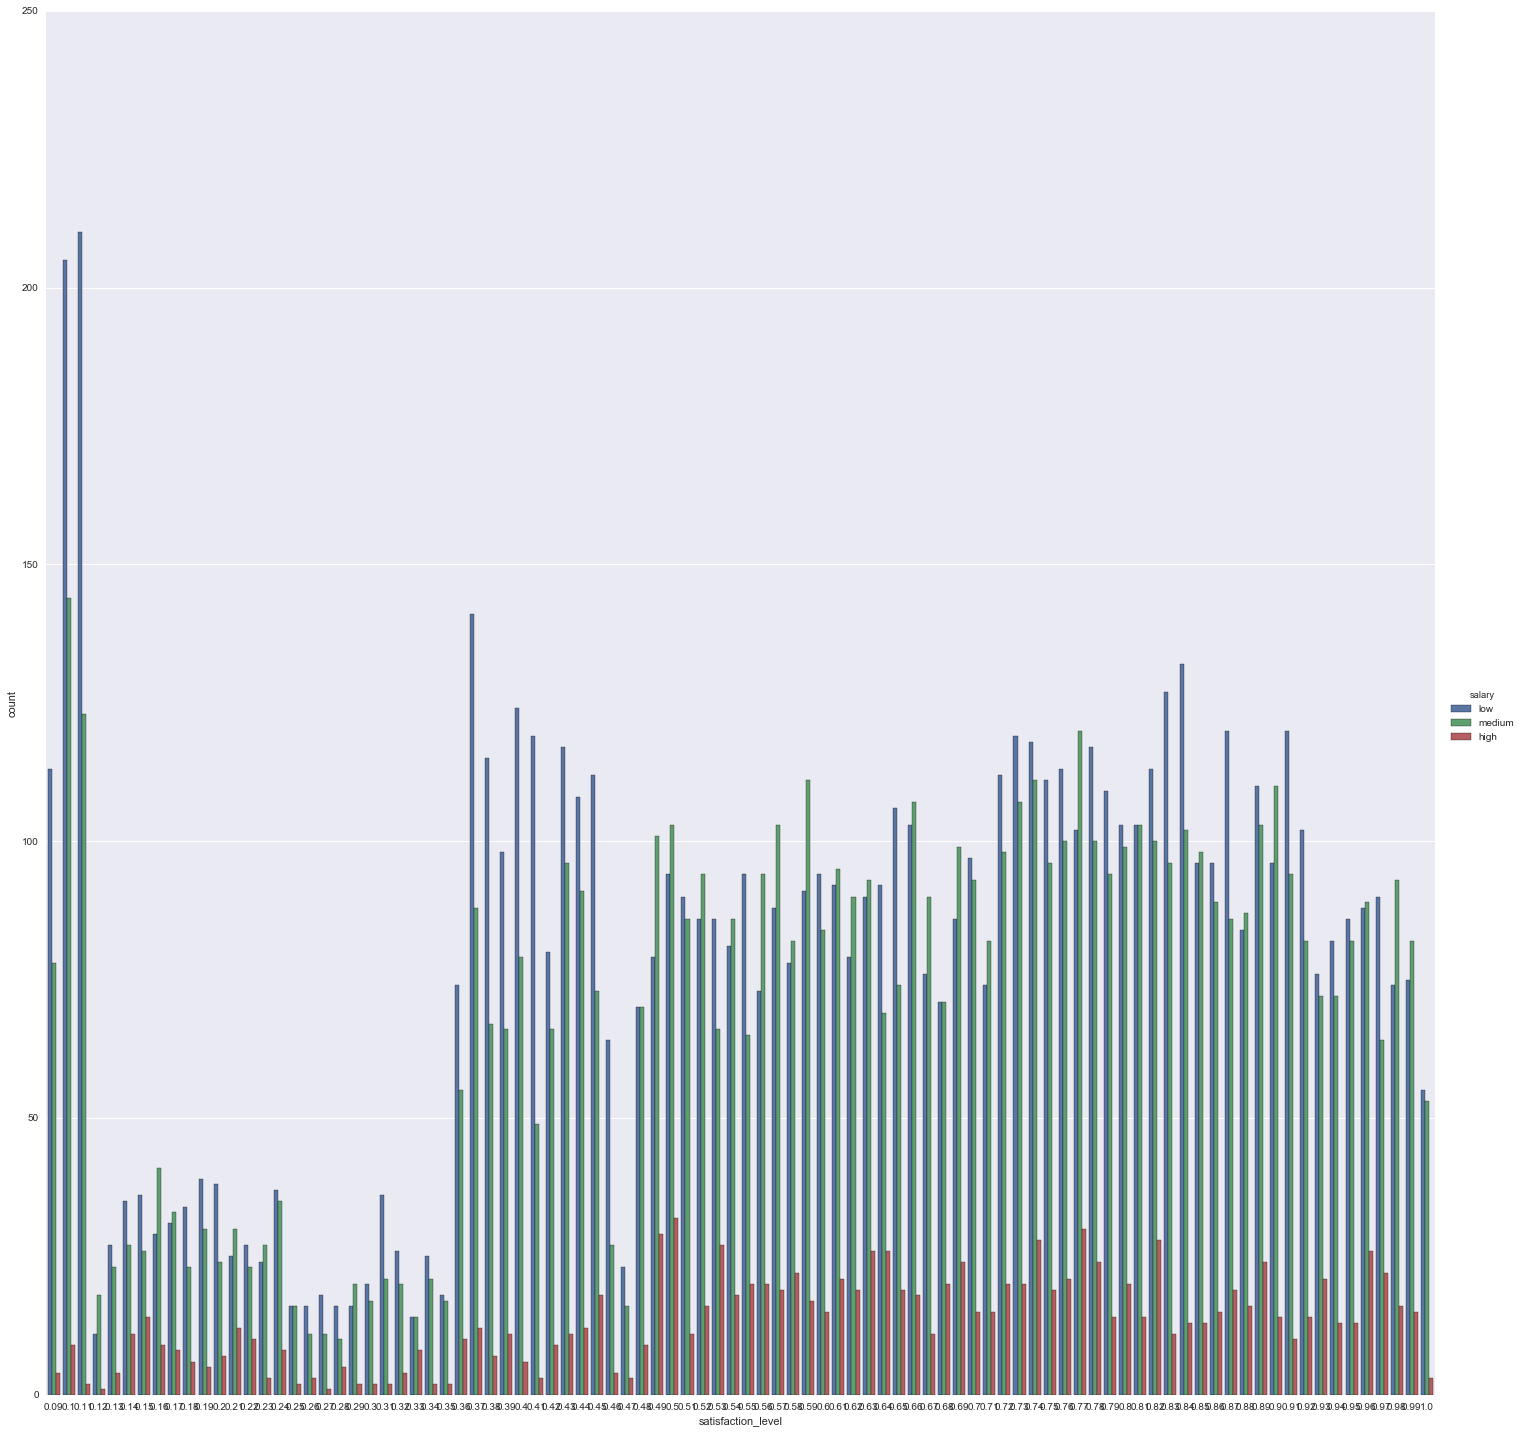

In [6]:
sns.factorplot('satisfaction_level',data=hr_df,kind='count',hue='salary',size=20,aspect=1)
# originally I thought low-paid group should have low satisfaction level, however, this is not the case. 
# the proportion of each income group in different satisfaction level is quite similar

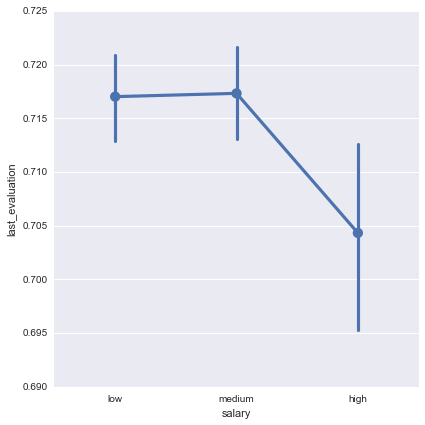

In [7]:
sns.factorplot('salary','last_evaluation',data=hr_df,size=6,aspect=1)
# higher income =/= high evaluation score, thats interesting

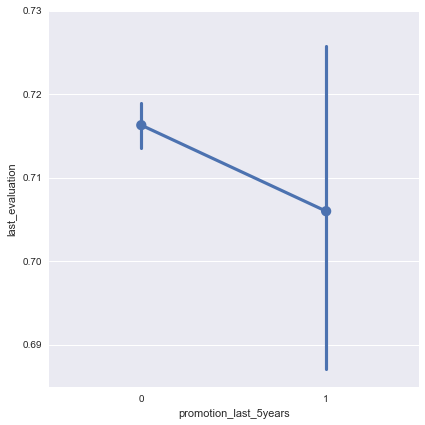

In [8]:
sns.factorplot('promotion_last_5years','last_evaluation',data=hr_df,size=6,aspect=1)
# seeing a wide spread of evaluation score on the promotion side, however, average E-score on that side is lower.
# this may due to only small portion of people got promoted

In [9]:
def promote(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'

In [10]:
result=hr_df['promotion_last_5years'].apply(promote)

In [11]:
hr_df['promotion_last_5years']=hr_df['promotion_last_5years'].apply(promote)

In [12]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,No,sales,low
1,0.80,0.86,5,262,6,0,1,No,sales,medium
2,0.11,0.88,7,272,4,0,1,No,sales,medium
3,0.72,0.87,5,223,5,0,1,No,sales,low
4,0.37,0.52,2,159,3,0,1,No,sales,low


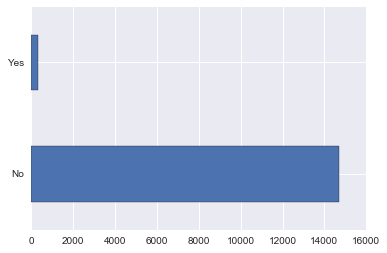

In [13]:
hr_df['promotion_last_5years'].value_counts().plot(kind='barh')

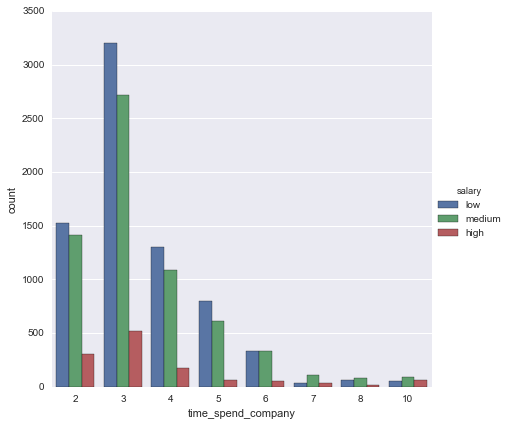

In [14]:
sns.factorplot('time_spend_company',data=hr_df,kind='count',hue='salary',size=6,aspect=1)
# most of the employees leave the company after 5 years

In [15]:
hr_df['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [16]:
def work_hrs_group(x):
    if 95<x<=155:
        return 155
    elif 156<x<=205:
        return 205
    elif 206<x<=265:
        return 265
    else:
        return 310
    

In [17]:
hr_df['average_monthly_hours_groups']=hr_df['average_montly_hours'].apply(work_hrs_group)

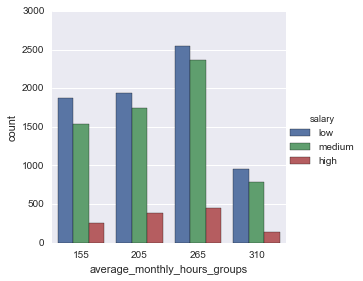

In [18]:
sns.factorplot('average_monthly_hours_groups',data=hr_df,hue='salary',kind='count')

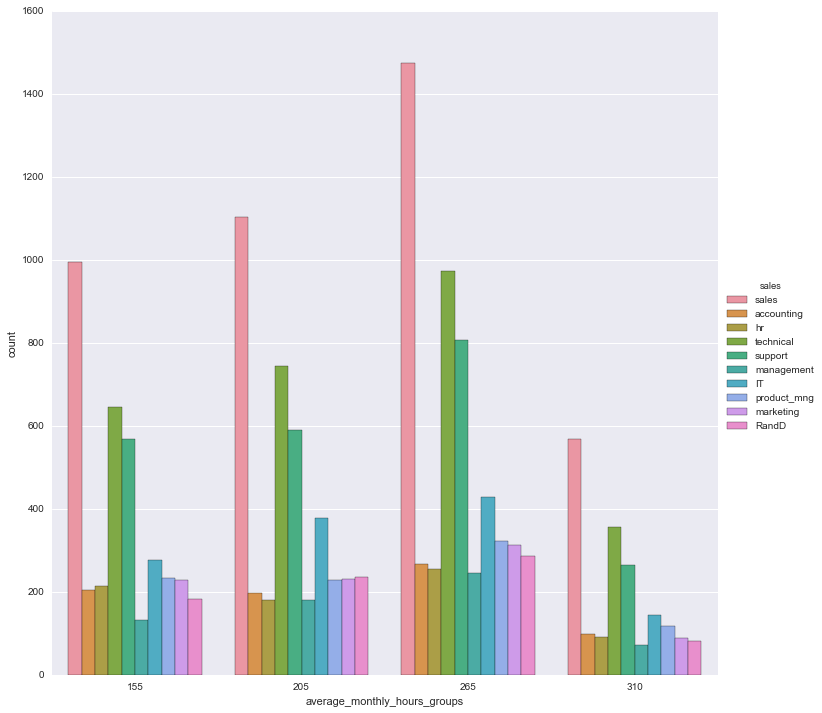

In [19]:
sns.factorplot('average_monthly_hours_groups',data=hr_df,hue='sales',kind='count',size=10)

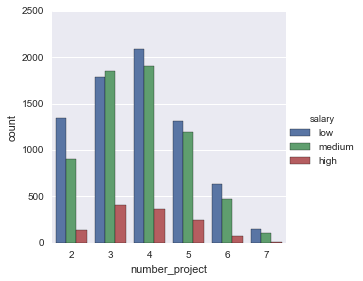

In [20]:
sns.factorplot('number_project',data=hr_df,hue='salary',kind='count')

In [21]:
# Data preparation
hr_df=pd.read_csv('C:/Users/user/py/hr/HR_comma_sep.csv')

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

C:\Users\user\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# see if any particular factors contribute to income
Y_salary = LabelEncoder().fit(hr_df.salary).transform(hr_df.salary)


In [24]:
Y_salary

array([1, 2, 2, ..., 1, 1, 1], dtype=int64)

In [25]:
X_salary_pre= hr_df.drop('salary',axis=1).drop('left',axis=1)

In [26]:
X_salary=pd.get_dummies(X_salary_pre)

In [27]:
X_salary.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.80,0.86,5,262,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_salary,Y_salary)

log_model=LogisticRegression()
log_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
from sklearn import metrics
prediction = log_model.predict(X_test)
print metrics.accuracy_score(Y_test,prediction)

0.498133333333


In [30]:
# very poor accuracy

In [31]:
# lets see how things contribute to leaving decision
hr_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [32]:
Y_left = hr_df.left
X_left = pd.get_dummies(hr_df.drop('left',axis=1))

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X_left,Y_left,test_size=0.4)
log_model2= LogisticRegression()
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
prediction2 = log_model2.predict(X_test)
print metrics.accuracy_score(Y_test,prediction2)

0.776833333333


In [35]:
log_result=pd.DataFrame(X_left.columns)
log_result.columns=['features']

In [36]:
log_result['coef']=pd.DataFrame(log_model2.coef_).transpose()

In [37]:
log_result

,features,coef
0,satisfaction_level,-4.047295
1,last_evaluation,0.754413
2,number_project,-0.284132
3,average_montly_hours,0.004061
4,time_spend_company,0.238250
5,Work_accident,-1.531458
6,promotion_last_5years,-1.292960
7,sales_IT,-0.160260
8,sales_RandD,-0.547192
9,sales_accounting,0.072388


In [38]:
# it makes sense to me because income really affects much whether the employee will leave or not